# Reading CSV file
Initialising necessary libraries for data manipulation and exploration/

In [1]:
import pandas as pd
file_path = r"D:\Portfolio Projects\Stroke Prediction\healthcare-dataset-stroke-data.csv" 
data = pd.read_csv(file_path, index_col= None) #Extracting data
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [2]:
data.drop(columns= 'id', inplace= True) #Dropped id column as it serves no purpose

In [3]:
data.describe().T #Computing summary statistics

,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [4]:
data.isna().sum()/5110*100 #To check what % of values are missing

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

# Missing Values
BMI column seems to be missing 3.93% values. Generally, null values are dropped if 5-10% of values are missing.

In [5]:
data.dropna(subset= 'bmi', inplace= True) #Dropped null values in bmi

In [6]:
data.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Exploratory Data Analysis (EDA)
The purpose of EDA is to get a general understanding of the distribution of various features in the dataset. 

In [7]:
stroke = data[data['stroke'] == 1]
no_stroke = data[data['stroke'] == 0]

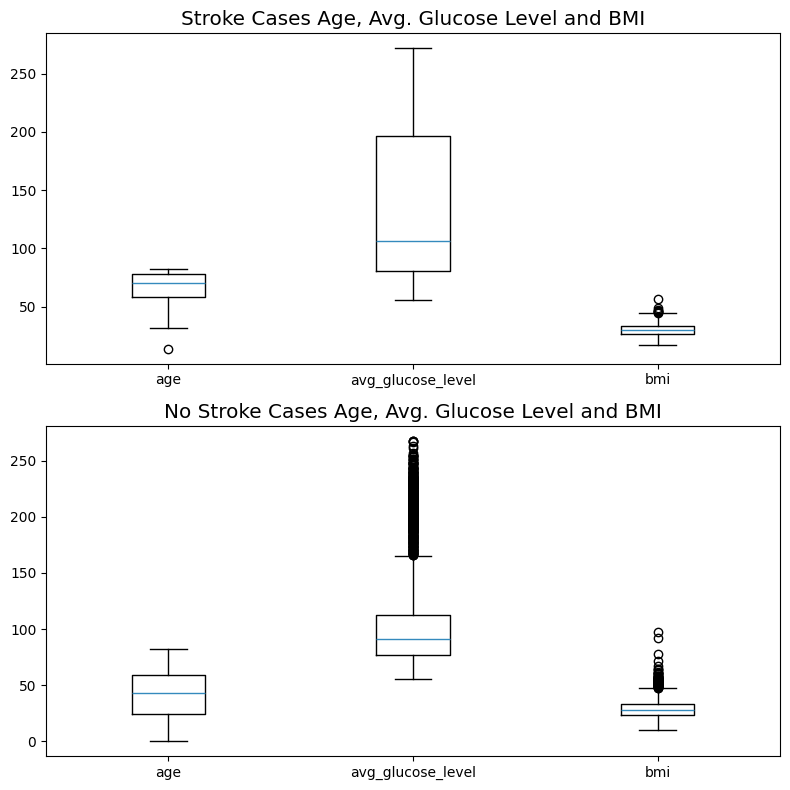

In [8]:
import matplotlib.pyplot as plt #To visualise
fig, ax = plt.subplots(2,1, figsize = (8,8)) #Creates ax object and fig object
plt.style.use("ggplot")
ax[0].boxplot(stroke[['age','avg_glucose_level','bmi']])
ax[0].set_xticklabels(['age','avg_glucose_level','bmi'])
ax[0].set_title("Stroke Cases Age, Avg. Glucose Level and BMI")
ax[1].boxplot(no_stroke[['age','avg_glucose_level','bmi']])
ax[1].set_xticklabels(['age','avg_glucose_level','bmi'])
ax[1].set_title("No Stroke Cases Age, Avg. Glucose Level and BMI")
plt.tight_layout()
plt.show()

# Outliers
Black dots are often called outliers. Outliers are anything that are 1.5 times lower than the Q1 (lower quartile) or 1.5 times more than the Q3 (upper quartile).

In [9]:
def plothist(ax, index, data, edgecolor, color, bin_size, xlabel, ylabel, label, title): #Function to reduce code redundancy
    ax[index].hist(data, edgecolor = edgecolor, color = color, bins = bin_size, label = label)
    ax[index].set_xlabel(xlabel)
    ax[index].set_ylabel(ylabel)
    ax[index].set_title(title)
    ax[index].legend()


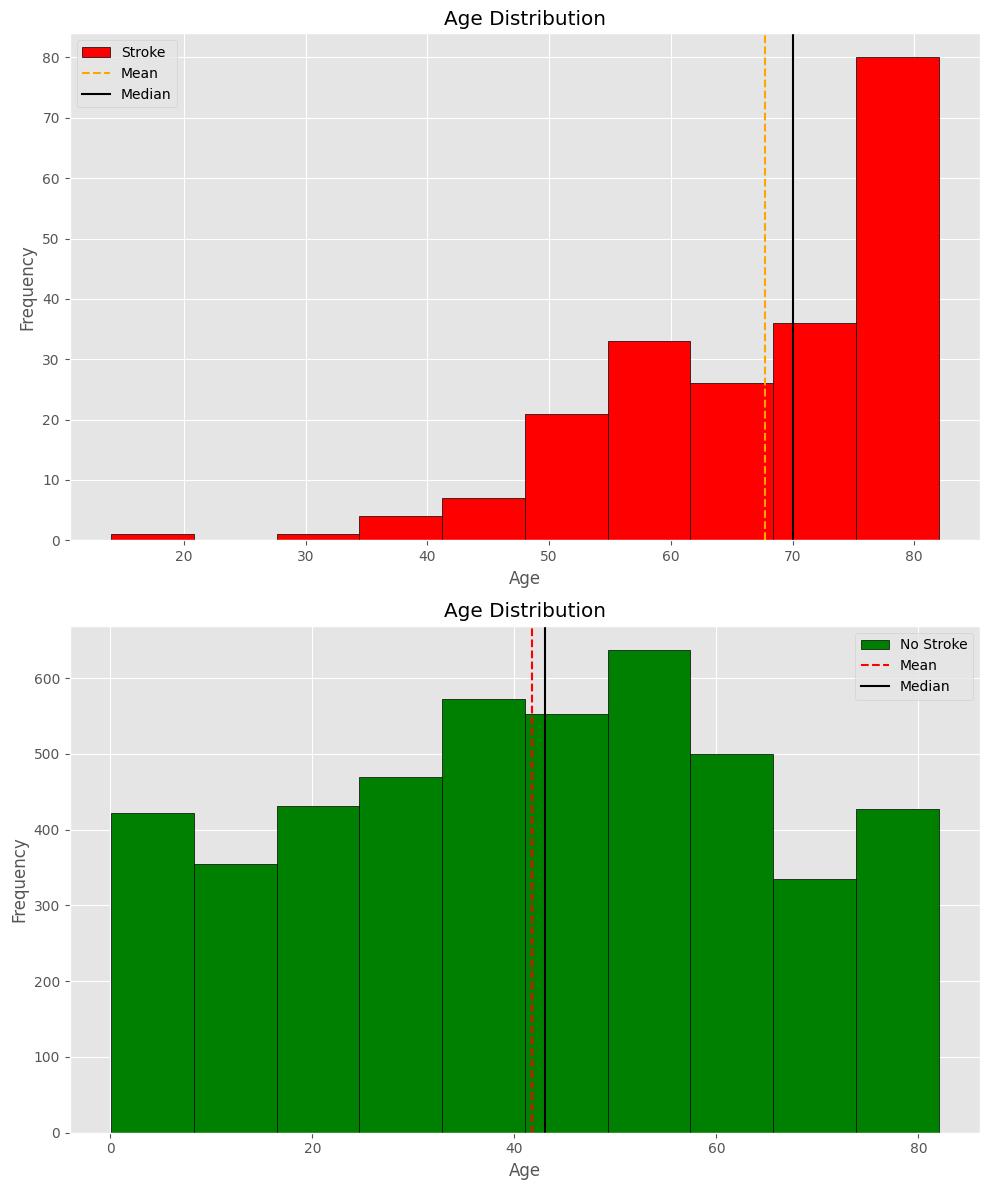

In [10]:
fig, ax = plt.subplots(2,1, figsize = (10,12)) #Creates ax object and fig object
plt.style.use("ggplot")
plothist(ax, 0, stroke['age'], "black", "red", 10, "Age", "Frequency", "Stroke", "Age Distribution")
ax[0].axvline(stroke['age'].mean(), color = 'orange', linestyle = '--', label = 'Mean')
ax[0].axvline(stroke['age'].median(), color = 'black', linestyle = '-', label = 'Median')
plothist(ax, 1, no_stroke['age'], "black", "green", 10, "Age", "Frequency", "No Stroke", "Age Distribution")
ax[1].axvline(no_stroke['age'].mean(), color = 'red', linestyle = '--', label = 'Mean')
ax[1].axvline(no_stroke['age'].median(), color = 'black', linestyle = '-', label = 'Median')
ax[0].legend()
ax[1].legend()
plt.tight_layout()
plt.show()

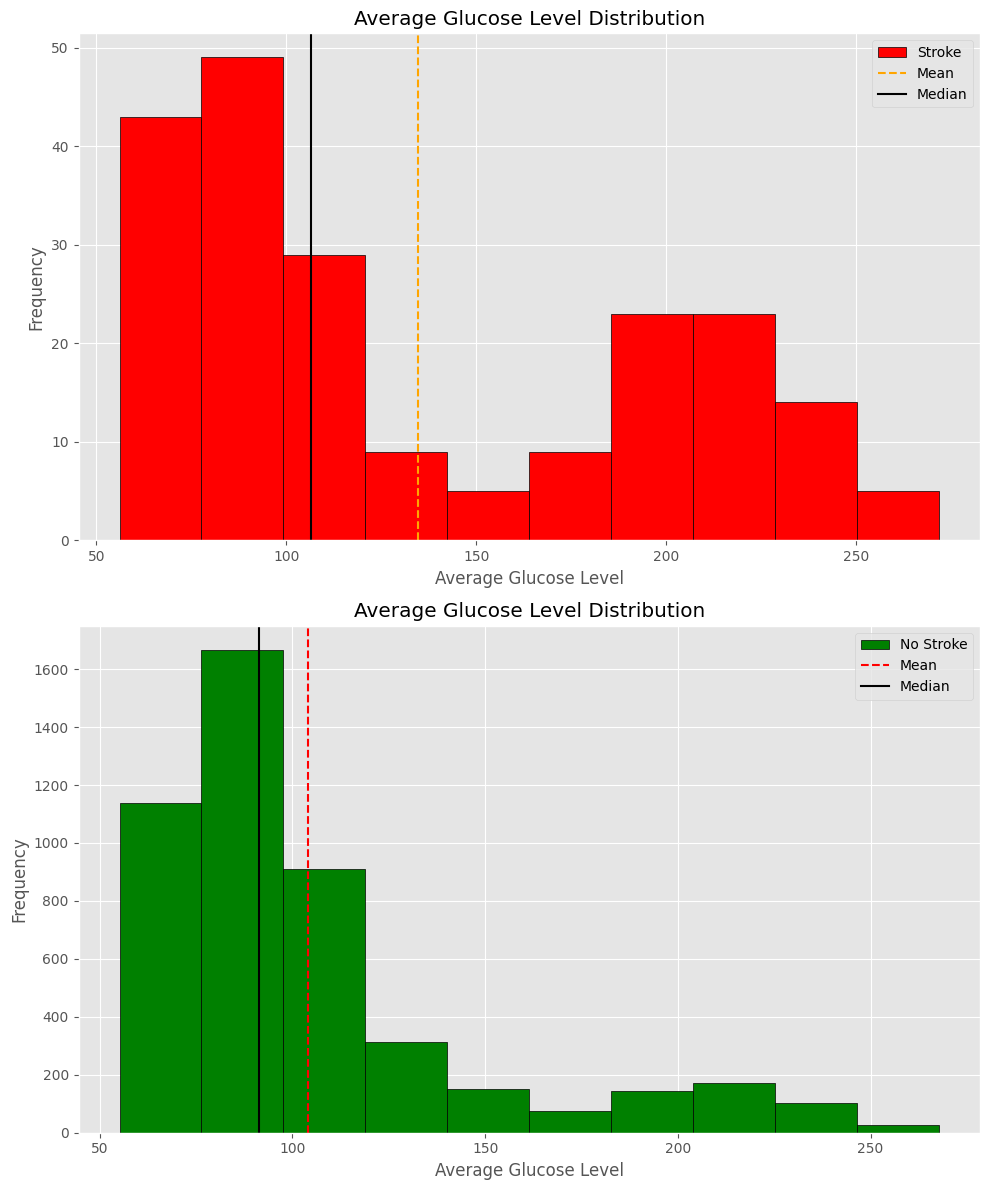

In [11]:
fig, ax = plt.subplots(2,1, figsize = (10,12)) #Creates ax object and fig object
plt.style.use("ggplot")
plothist(ax, 0, stroke['avg_glucose_level'], "black", "red", 10, "Average Glucose Level", "Frequency", "Stroke", "Average Glucose Level Distribution")
ax[0].axvline(stroke['avg_glucose_level'].mean(), color = 'orange', linestyle = '--', label = 'Mean')
ax[0].axvline(stroke['avg_glucose_level'].median(), color = 'black', linestyle = '-', label = 'Median')
plothist(ax, 1, no_stroke['avg_glucose_level'], "black", "green", 10, "Average Glucose Level", "Frequency", "No Stroke", "Average Glucose Level Distribution")
ax[1].axvline(no_stroke['avg_glucose_level'].mean(), color = 'red', linestyle = '--', label = 'Mean')
ax[1].axvline(no_stroke['avg_glucose_level'].median(), color = 'black', linestyle = '-', label = 'Median')
ax[0].legend()
ax[1].legend()
plt.tight_layout()
plt.show()

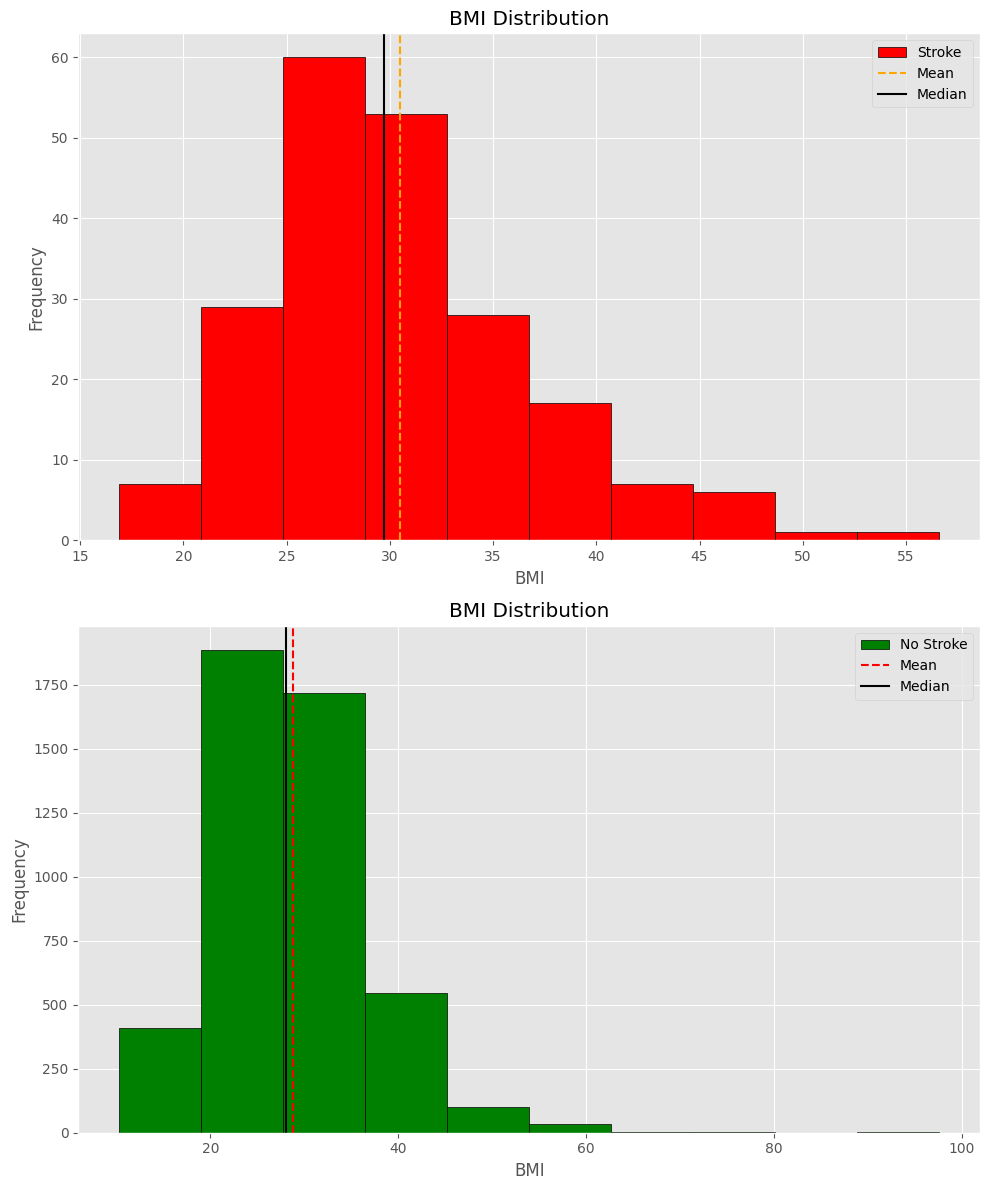

In [12]:
fig, ax = plt.subplots(2,1, figsize = (10,12)) #Creates ax object and fig object
plt.style.use("ggplot")
plothist(ax, 0, stroke['bmi'], "black", "red", 10, "BMI", "Frequency", "Stroke", "BMI Distribution")
ax[0].axvline(stroke['bmi'].mean(), color = 'orange', linestyle = '--', label = 'Mean')
ax[0].axvline(stroke['bmi'].median(), color = 'black', linestyle = '-', label = 'Median')
plothist(ax, 1, no_stroke['bmi'], "black", "green", 10, "BMI", "Frequency", "No Stroke", "BMI Distribution")
ax[1].axvline(no_stroke['bmi'].mean(), color = 'red', linestyle = '--', label = 'Mean')
ax[1].axvline(no_stroke['bmi'].median(), color = 'black', linestyle = '-', label = 'Median')
ax[0].legend()
ax[1].legend()
plt.tight_layout()
plt.show()

In [13]:
stroke_instances = data['stroke'].value_counts(normalize= True) #Computes instances of stroke and no strokes as a percentage of total
stroke_instances

stroke
0    0.957425
1    0.042575
Name: proportion, dtype: float64

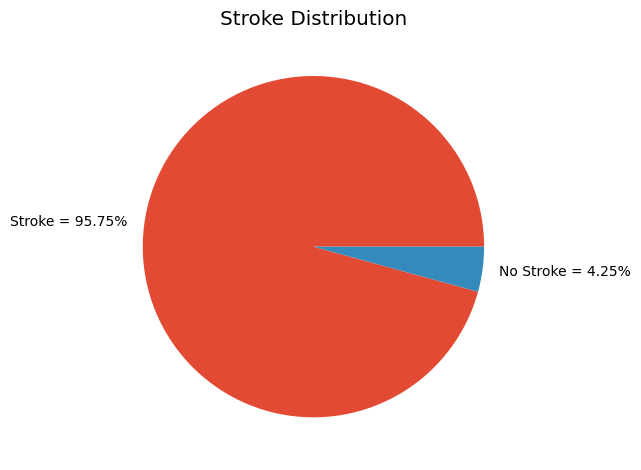

In [14]:
fig, ax = plt.subplots() #Creates ax object and fig object
plt.style.use("ggplot")
ax.pie(stroke_instances, labels= ['Stroke = 95.75%','No Stroke = 4.25%'])
ax.set_title("Stroke Distribution")
plt.tight_layout()
plt.show()


# Class Imbalance
Class imbalance occurs when the classes in a dataset are not equally represented. One way to address class imabalance is to use SMOTE in which synthetic data for the minority class is created using sampling methods.

In [15]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

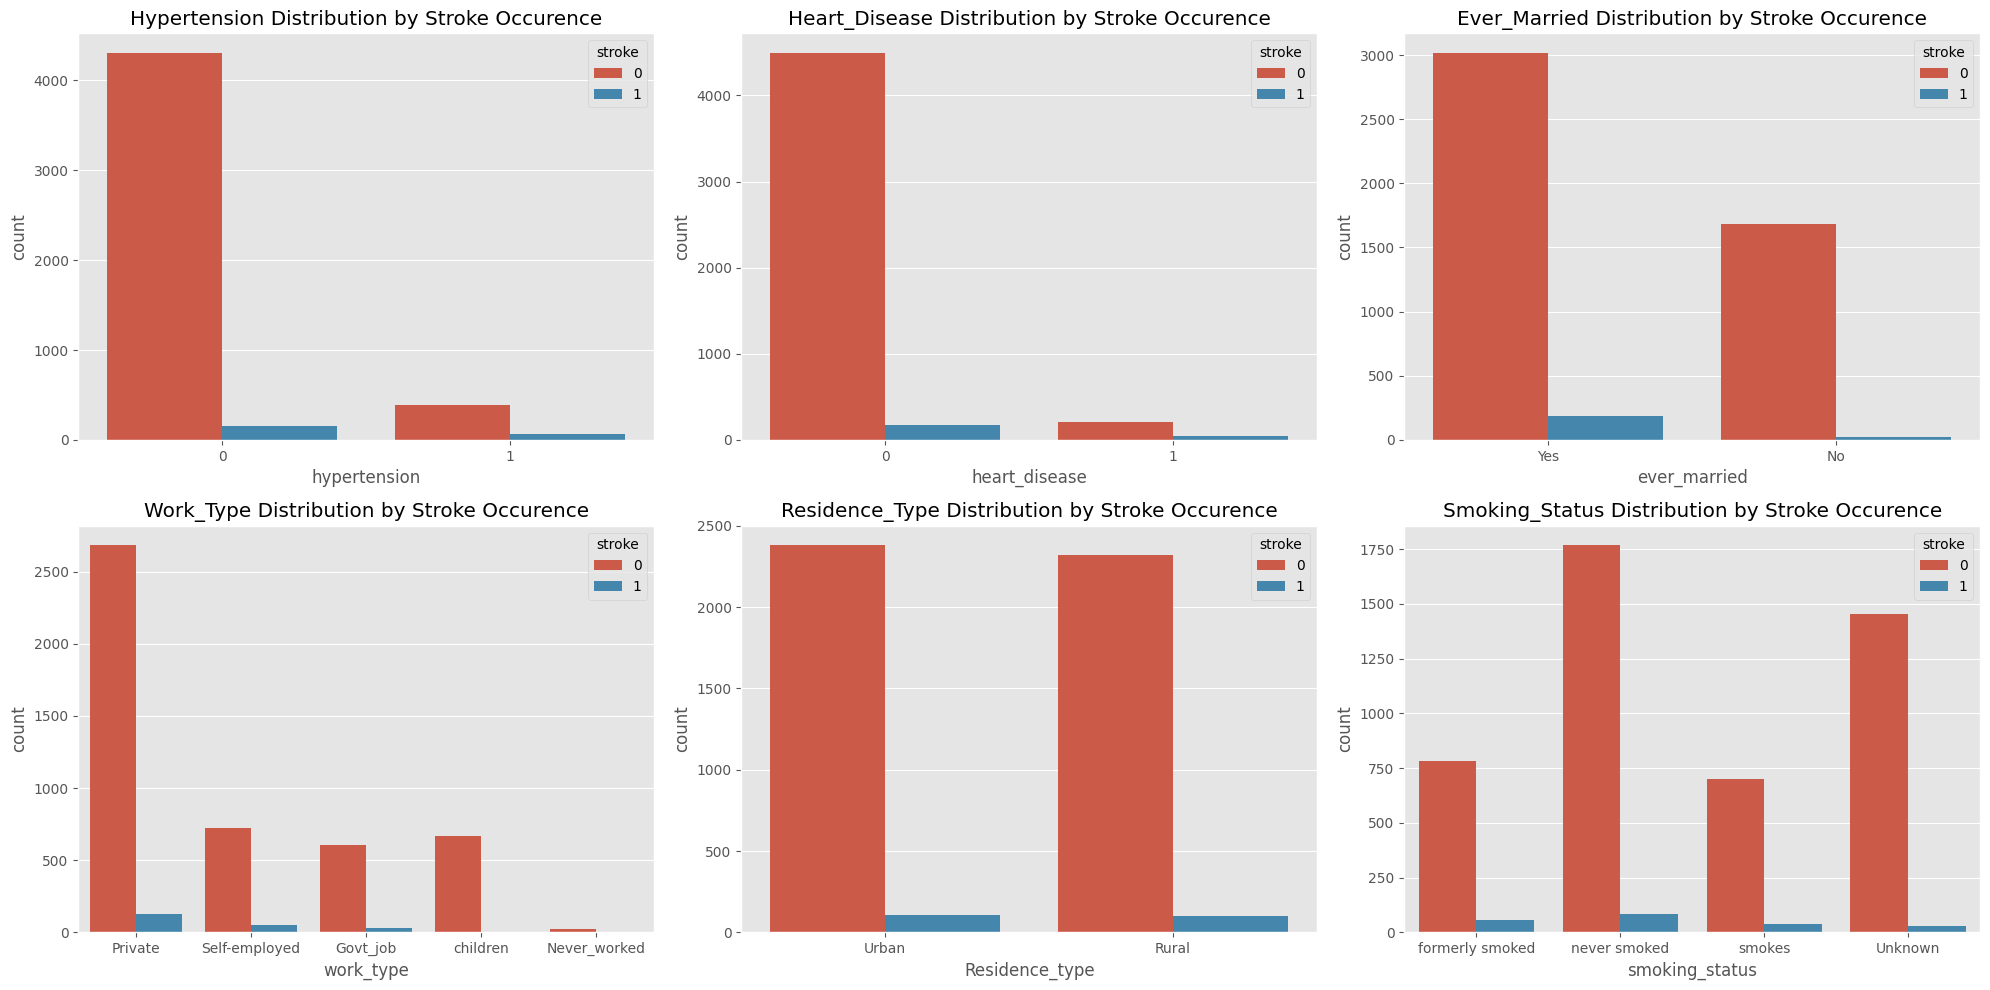

In [16]:
import seaborn as sns
x_values = ['hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'smoking_status']
fig, axis = plt.subplots(2,3, figsize = (20,10))
for ax, x_value in zip(axis.flat, x_values):
    sns.countplot(data= data, x= x_value, hue = 'stroke', ax= ax)
    ax.set_title(f'{x_value.title()} Distribution by Stroke Occurence')

plt.tight_layout()
plt.show()

# Feature Enigneering
Feature engineering is used to create extra features from existing data, based on user-defined rules that facilitates better model learning, and hence improves performance and accuracy.

In [17]:
data1 = data.copy()
data1['age'] = data1['age'].astype(int)

In [18]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4909.0,42.854145,22.575986,0.00,25.00,44.00,60.00,82.00
hypertension,4909.0,0.091872,0.288875,0.00,0.00,0.00,0.00,1.00
heart_disease,4909.0,0.049501,0.216934,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,4909.0,105.305150,44.424341,55.12,77.07,91.68,113.57,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.50,28.10,33.10,97.60
stroke,4909.0,0.042575,0.201917,0.00,0.00,0.00,0.00,1.00


In [19]:
data1['age_group'] = pd.cut(data1['age'], bins=[0, 12, 18, 30, 50, 65, 80, 120], labels=['Child', 'Teenager', 'Young Adult', 'Adult', 'Middle-Aged', 'Senior', 'Elderly'])
data1


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Senior
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Senior
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Adult
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Senior
5,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,Elderly
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13,0,0,No,children,Rural,103.08,18.6,Unknown,0,Teenager
5106,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,Elderly
5107,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,Adult
5108,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,Middle-Aged


In [20]:
data1['bmi_group'] = pd.cut(data1['bmi'], bins=[0, 18.5, 24.9, 29.9, 34.9, 39.9], labels=['Underweight', 'Healthy', 'Overweight', 'Obese', 'Severely Obese'])
data1


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,bmi_group
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Senior,Severely Obese
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Senior,Obese
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Adult,Obese
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Senior,Healthy
5,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,Elderly,Overweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13,0,0,No,children,Rural,103.08,18.6,Unknown,0,Teenager,Healthy
5106,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,Elderly,NaN
5107,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,Adult,Obese
5108,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,Middle-Aged,Overweight


In [21]:
data1['avg_glucose_level_groups'] = pd.cut(data1['avg_glucose_level'], bins = [50,70,99,125,272], labels= ['Low Glucose','Normal','Prediabetes','Diabetes'])
data1

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,bmi_group,avg_glucose_level_groups
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Senior,Severely Obese,Diabetes
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Senior,Obese,Prediabetes
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Adult,Obese,Diabetes
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Senior,Healthy,Diabetes
5,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,Elderly,Overweight,Diabetes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13,0,0,No,children,Rural,103.08,18.6,Unknown,0,Teenager,Healthy,Prediabetes
5106,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,Elderly,NaN,Diabetes
5107,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,Adult,Obese,Normal
5108,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,Middle-Aged,Overweight,Diabetes


In [22]:
data2 = data1.copy()
data2

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,bmi_group,avg_glucose_level_groups
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Senior,Severely Obese,Diabetes
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Senior,Obese,Prediabetes
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Adult,Obese,Diabetes
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Senior,Healthy,Diabetes
5,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,Elderly,Overweight,Diabetes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13,0,0,No,children,Rural,103.08,18.6,Unknown,0,Teenager,Healthy,Prediabetes
5106,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,Elderly,NaN,Diabetes
5107,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,Adult,Obese,Normal
5108,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,Middle-Aged,Overweight,Diabetes


# Encoding
Encoding is a process where categorical values are converted to binary values of 0, if absent, or 1, if present.  

In [23]:
#Splitting into data training_df and test_df
data2 = pd.get_dummies(data2, drop_first= True, dtype= int)
data2.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_Male', 'gender_Other', 'ever_married_Yes',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'age_group_Teenager', 'age_group_Young Adult',
       'age_group_Adult', 'age_group_Middle-Aged', 'age_group_Senior',
       'age_group_Elderly', 'bmi_group_Healthy', 'bmi_group_Overweight',
       'bmi_group_Obese', 'bmi_group_Severely Obese',
       'avg_glucose_level_groups_Normal',
       'avg_glucose_level_groups_Prediabetes',
       'avg_glucose_level_groups_Diabetes'],
      dtype='object')

In [24]:
data2.drop(columns = ['gender_Other'], inplace = True)

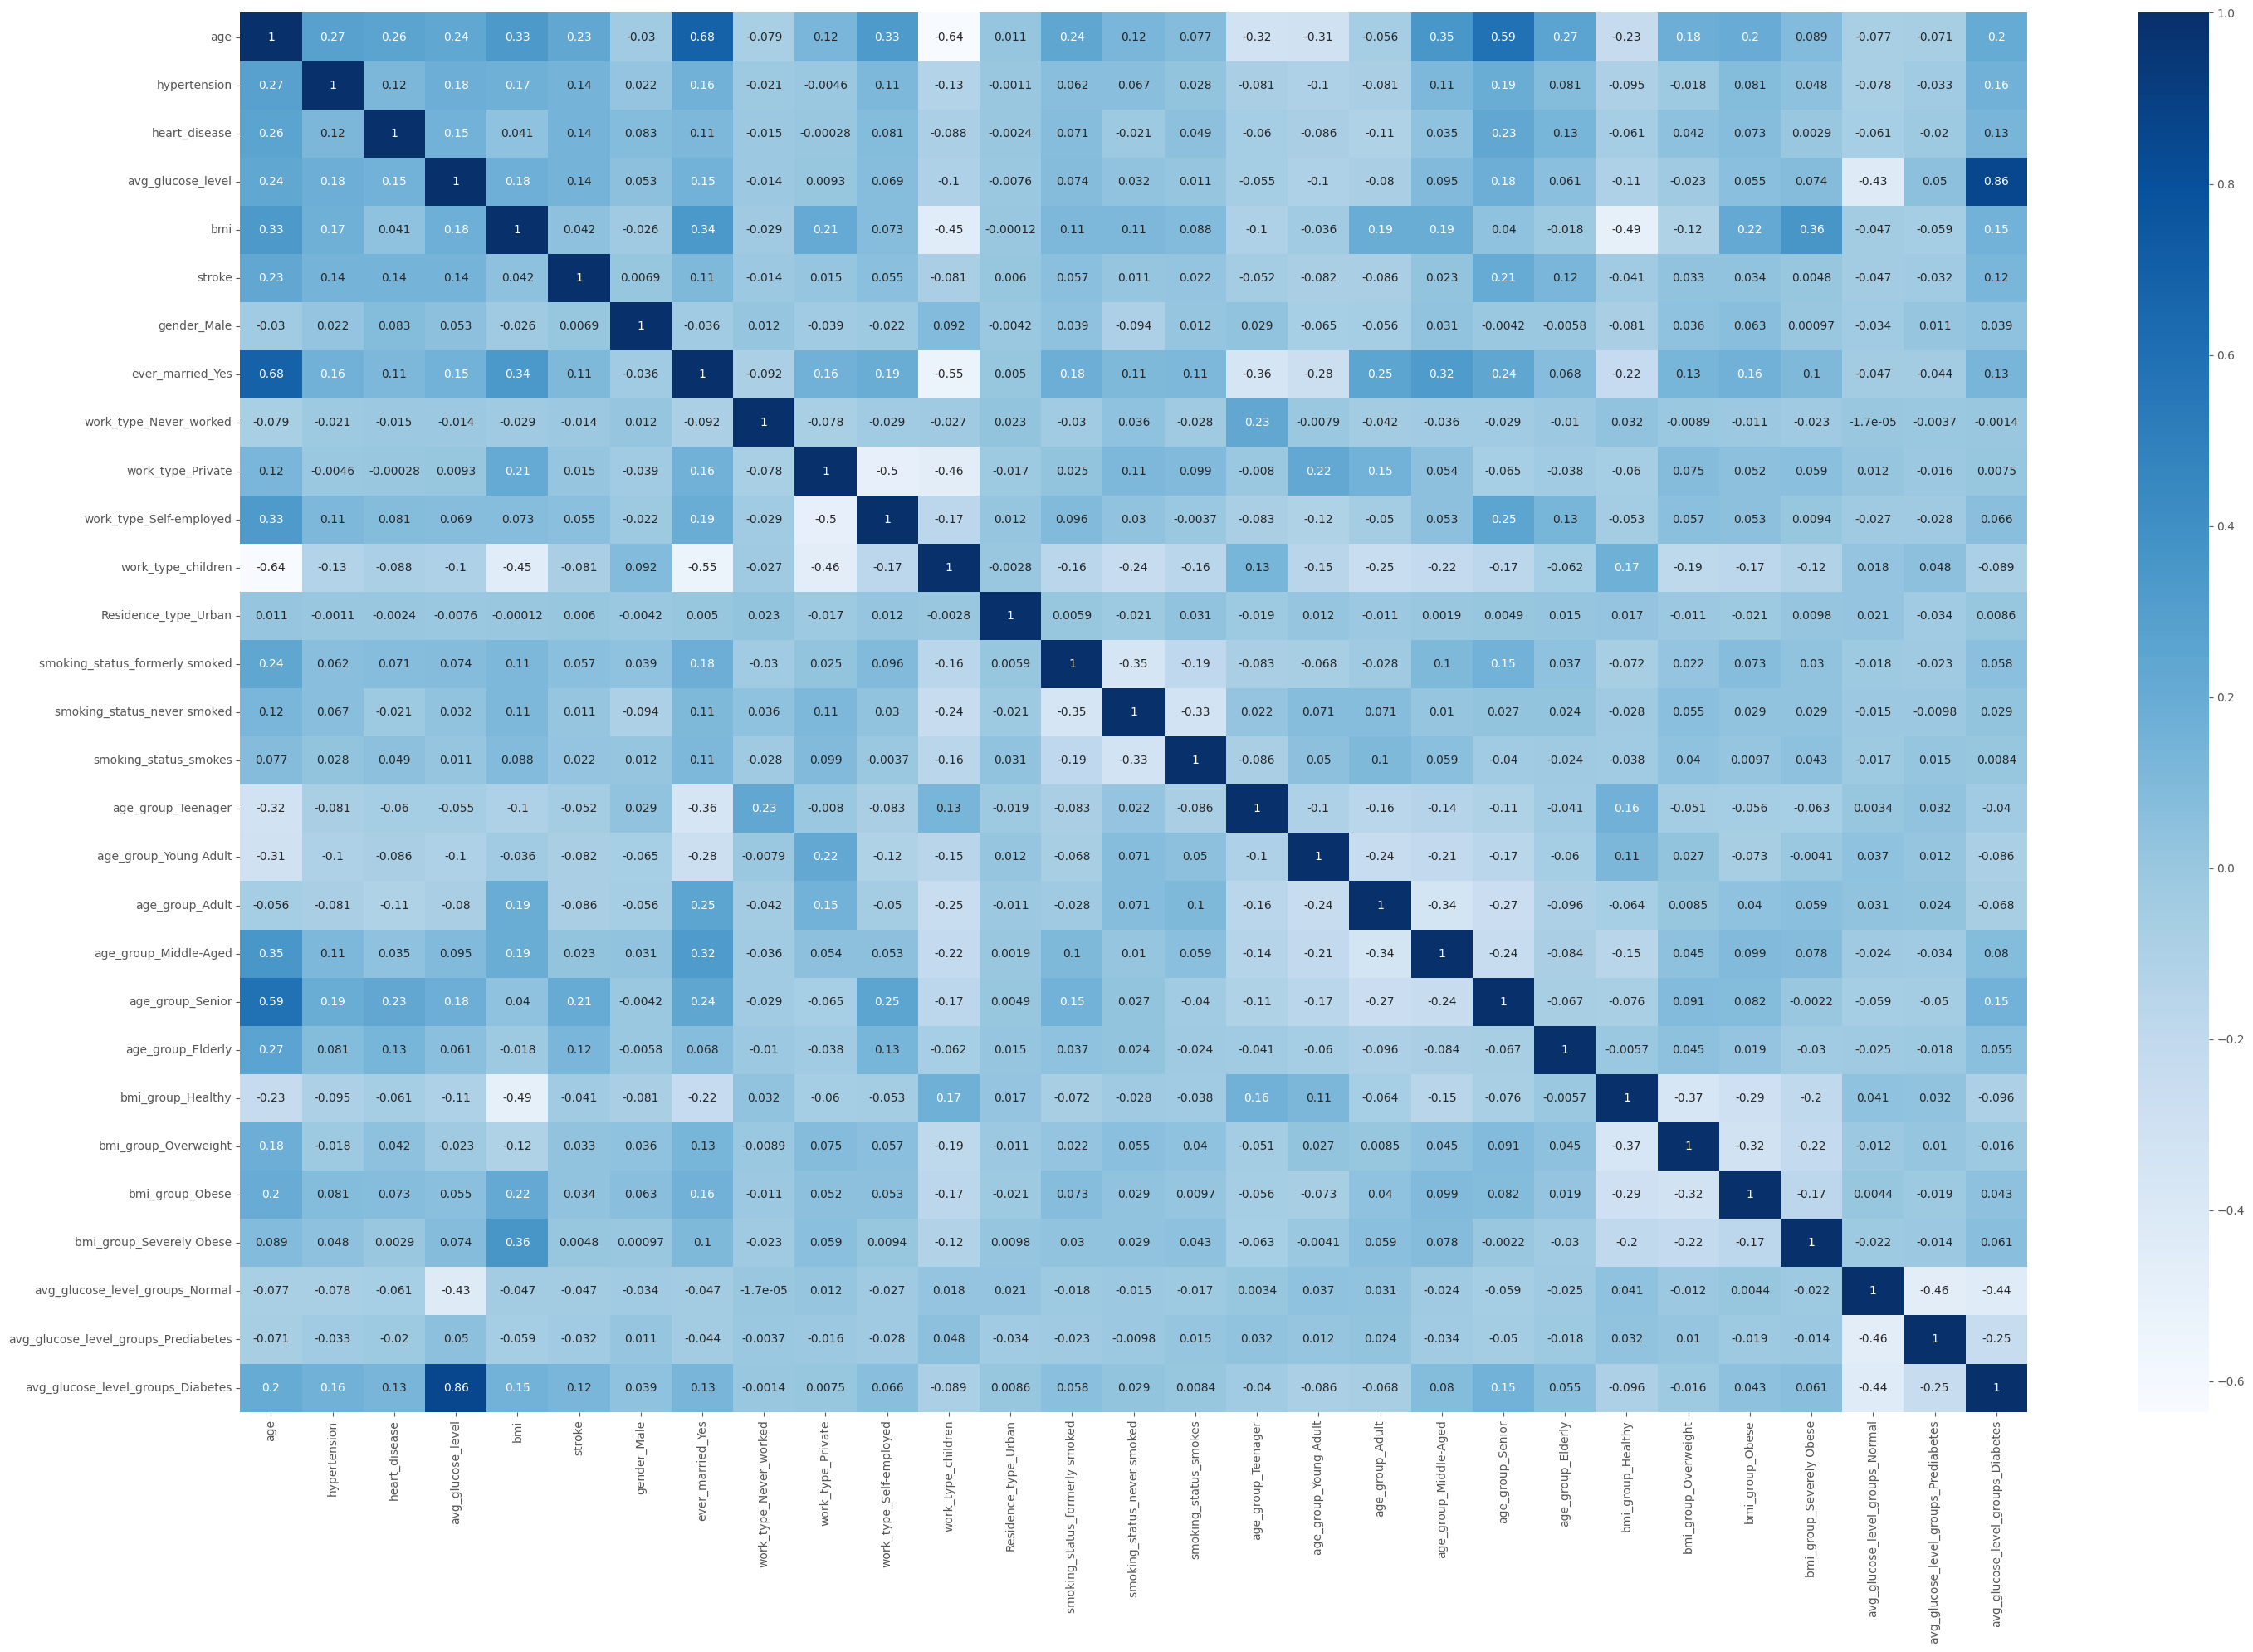

In [25]:
correlation = data2.corr()
import seaborn as sns
fig, ax = plt.subplots(figsize = [30,20])
sns.heatmap(correlation, annot= True, cmap = 'Blues')
plt.tight_layout()
plt.show()

In [26]:
X = data2.drop(columns= 'stroke', axis = 1) #Indepdendent features
y = data2['stroke'] #Target Variable

In [27]:
from imblearn.over_sampling import SMOTE #To handle class imbalance. 
smote = SMOTE(sampling_strategy='auto', random_state=42)
X, y = smote.fit_resample(X, y)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler() #Robust scaler handles outliers as it utilises IQR and median to scale data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, shuffle= True, random_state= 42)
cols_to_scale = ['age', 'bmi', 'avg_glucose_level'] #Only the interested columns we want to scale
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

# Models used
1. Decision Tree Classifier
2. Random Forest (CART)
3. KNN
4. Gaussian Naive Bayes
5. SVM
6. Logistic Regression

In [29]:
#Importing necessary modules. For now, the models will be train using default values, so the results can be compared before and after hyperparameter tuning.
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

Model Name: K-Neighbors Classifier
Training Score: 0.9516717325227964
Test Score: 0.9308510638297872


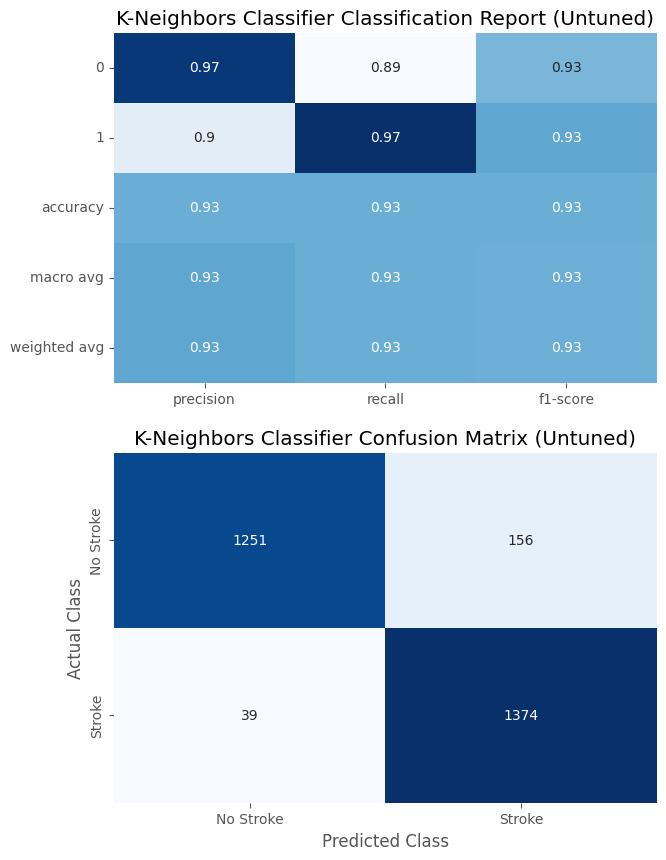

<Figure size 700x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

Model Name: Logistic Regression
Training Score: 0.9127659574468086
Test Score: 0.9053191489361702


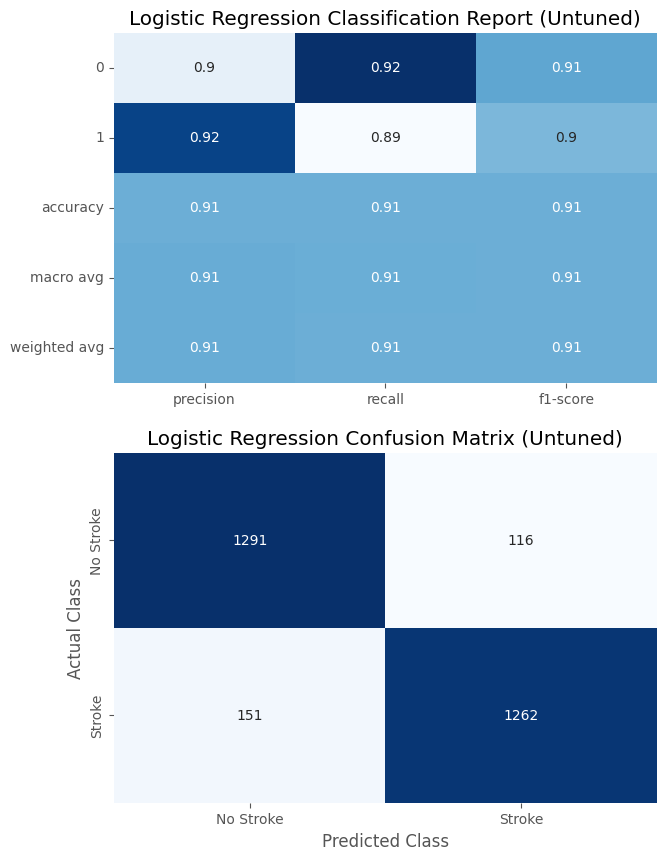

<Figure size 700x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

Model Name: Decision Tree
Training Score: 1.0
Test Score: 0.9322695035460993


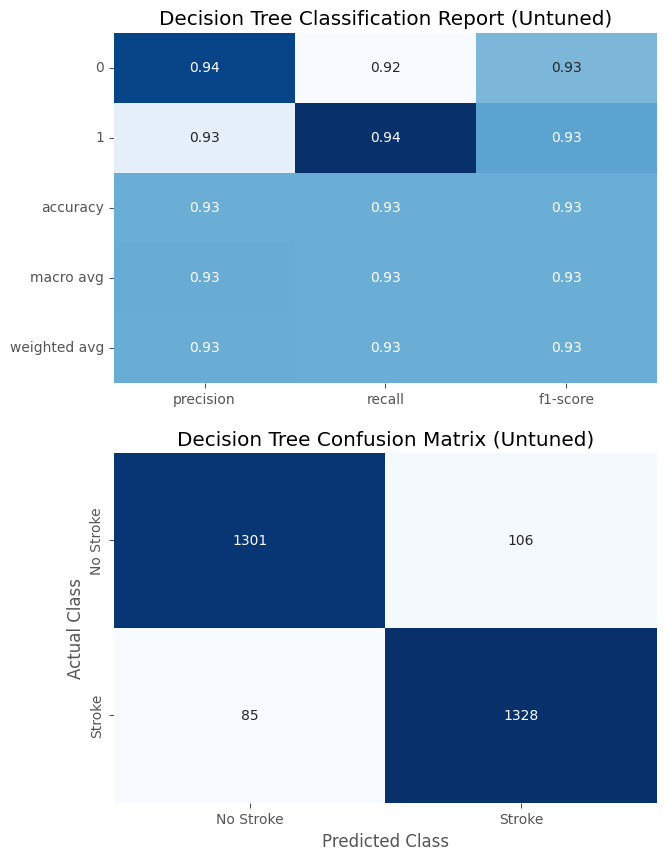

<Figure size 700x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

Model Name: Gaussian Naive Bayes
Training Score: 0.6768996960486322
Test Score: 0.6666666666666666


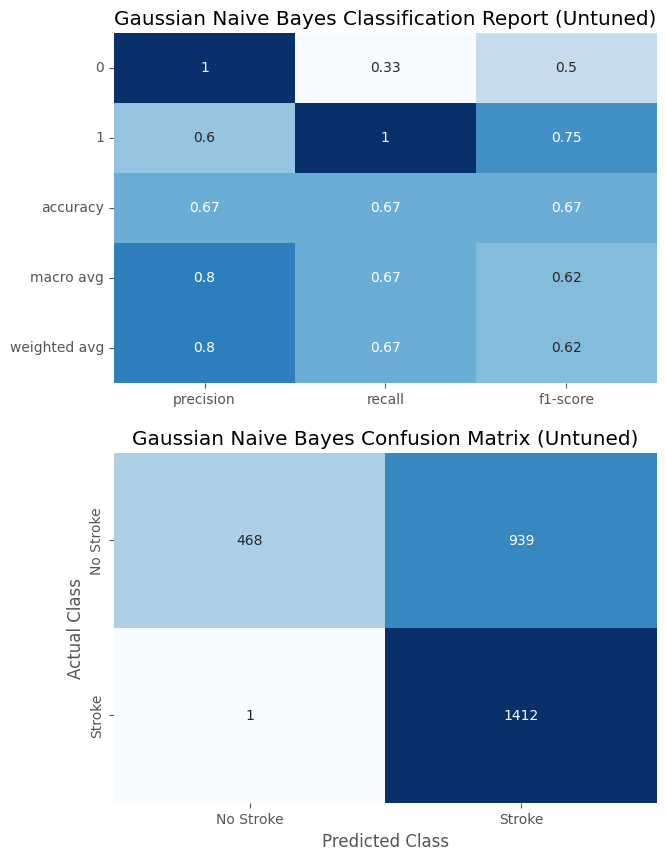

<Figure size 700x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

Model Name: Support Vector Machine
Training Score: 0.9565349544072949
Test Score: 0.9443262411347517


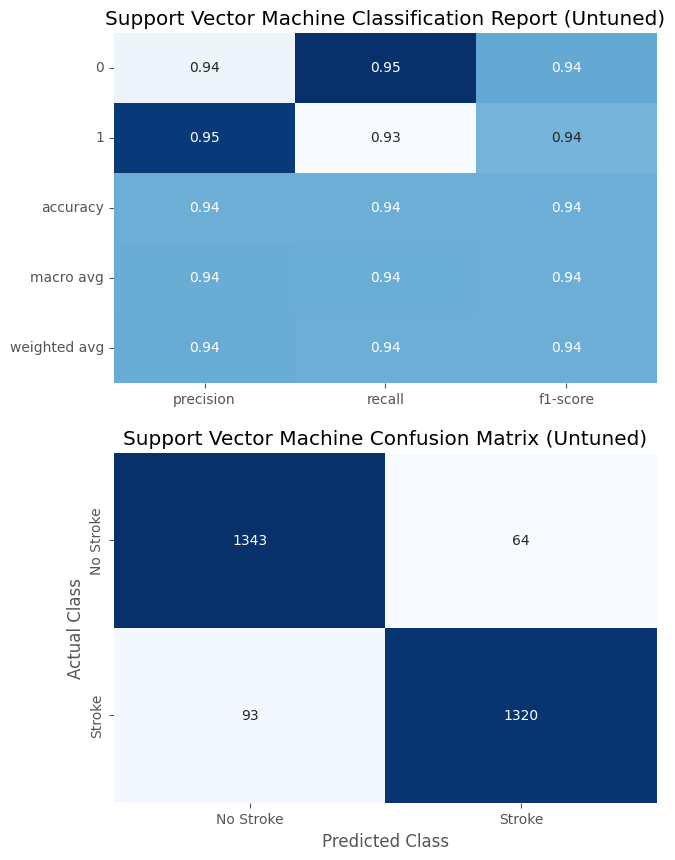

<Figure size 700x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

Model Name: Random Forest
Training Score: 1.0
Test Score: 0.9666666666666667


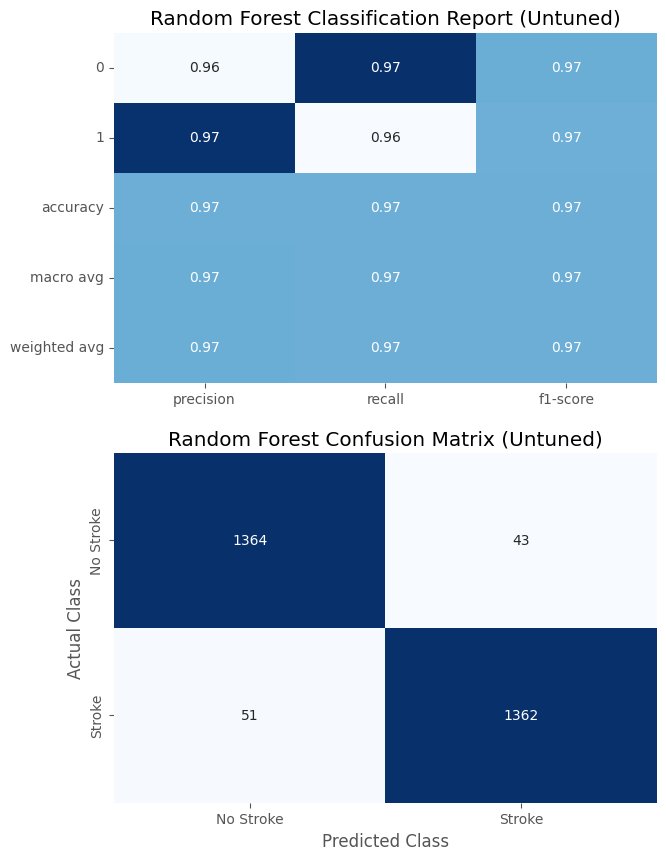

<Figure size 700x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

In [30]:
#Initiating models in a dictionary, so it can be used in a foor loop
models = {"K-Neighbors Classifier": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(),
          "Decision Tree": DecisionTreeClassifier(),
          "Gaussian Naive Bayes": GaussianNB(),
          "Support Vector Machine": SVC(),
          "Random Forest": RandomForestClassifier()}

for name, model in models.items():
    print(f'Model Name: {name}')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    training_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    report = classification_report(y_test, y_pred, output_dict= True)
    report_df = pd.DataFrame(report).T
    report_df = report_df.drop(columns=['support'])
    
    #Setting the style
    plt.style.use("ggplot")

    #PLotting classification report
    fig, ax = plt.subplots(2,1, figsize = [7,10])
    sns.heatmap(report_df, annot = True, cmap= 'Blues', cbar= False, ax = ax[0])
    ax[0].set_title(f'{name} Classification Report (Untuned)')
    
    #Plotting and customising confusion matrix
    matrix = confusion_matrix(y_test, y_pred)
    print(f'Training Score: {training_score}')
    print(f'Test Score: {test_score}')
    plt.figure(figsize= (7,5))
    plt.figure(figsize = (6,5))
    sns.heatmap(matrix, annot= True, fmt = 'd', cmap= 'Blues', cbar= False,
                xticklabels= ['No Stroke', 'Stroke'],
                yticklabels= ['No Stroke', 'Stroke'], ax = ax[1])
    ax[1].set_xlabel("Predicted Class")
    ax[1].set_ylabel("Actual Class")
    ax[1].set_title(f'{name} Confusion Matrix (Untuned)')
    plt.tight_layout()
    plt.show()


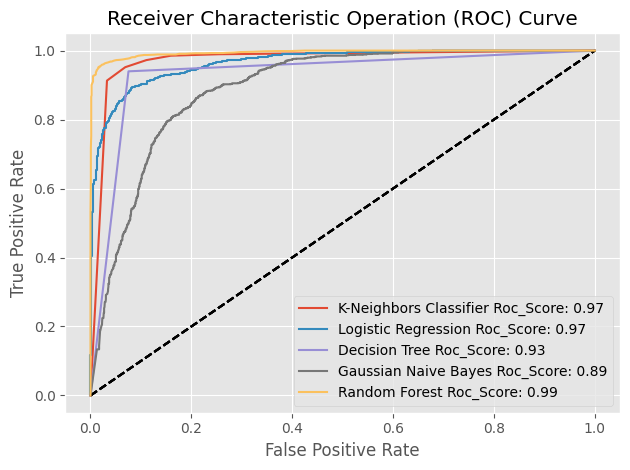

In [31]:
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_pred_probs = model.predict_proba(X_test)[:,1] #Extracts the probability estimates of stroke cases
        roc_auc_scores = roc_auc_score(y_test, y_pred_probs)
    else:
        continue #Ignores model that don't have a probability estimation predictor
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr, tpr, label = f"{name} Roc_Score: {round(roc_auc_scores,2)}")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title("Receiver Characteristic Operation (ROC) Curve")
    plt.legend()
    plt.tight_layout()

# Model Selection
The models were trained using default parameters, and the best performance was achieved by Random Forest, which attained a 96.63% test accuracy. It was closely followed by Support Vector Machine (SVM) with 94.39% test accuracy. These two models effectively balanced precision and recall, with Random Forest yielding 44 false positives and 51 false negatives, while SVM had 64 false positives and 94 false negatives.

In contrast, Gaussian Naïve Bayes struggled significantly, achieving only 66.67% accuracy. Its poor performance was largely due to its strong independence assumptions, which made it difficult to correctly classify non-stroke cases.

Logistic Regression and K-Nearest Neighbours (KNN) delivered good performance but lagged behind SVM and Random Forest, indicating that the problem requires more complex decision boundaries for optimal classification.

In [32]:
# Hyperparameter tuning SVM
from sklearn.model_selection import RandomizedSearchCV, KFold
import numpy as np

#Initiating K-Fold for cross-validation. In this case, 5-fold cross validation is used. 
#It is recommended to use 5 or less, as more splits = more computationally expensive
kf = KFold(n_splits=5, shuffle=True, random_state=42) 
SVM_params = {"C": [0.1, 1, 10, 20, 50, 100],  
    "gamma": ['scale', 'auto'],  
    "kernel": ['linear', 'rbf']}
scoring_metrics = {"Precision": "precision", "Recall": "recall"}
cv = RandomizedSearchCV(SVC(probability=True), param_distributions=SVM_params, 
                        scoring=scoring_metrics, refit='Recall', cv=kf, 
                        n_iter=9, n_jobs=-1, random_state=42)  
cv.fit(X_train, y_train)
print("Best Parameters: SVM")
print(cv.best_params_)

Best Parameters: SVM
{'kernel': 'rbf', 'gamma': 'scale', 'C': 100}


In [33]:
#Hyperparameter tuning Random Forest
rf_params = {"n_estimators": [200, 500],
             "criterion": ['gini', 'entropy'],
             'max_depth': [10, 20],
             'min_samples_split': [2, 5]}
cv = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_params, 
                        scoring=scoring_metrics, refit='Recall', cv=kf, 
                        n_iter=9, n_jobs=-1, random_state=42)  
cv.fit(X_train, y_train)
print("Best Parameters: Random Forest Classifier")
print(cv.best_params_)

Best Parameters: Random Forest Classifier
{'n_estimators': 500, 'min_samples_split': 2, 'max_depth': 20, 'criterion': 'entropy'}


Model Name: Random Forest
Training Score: 1.0
Test Score: 0.9670212765957447


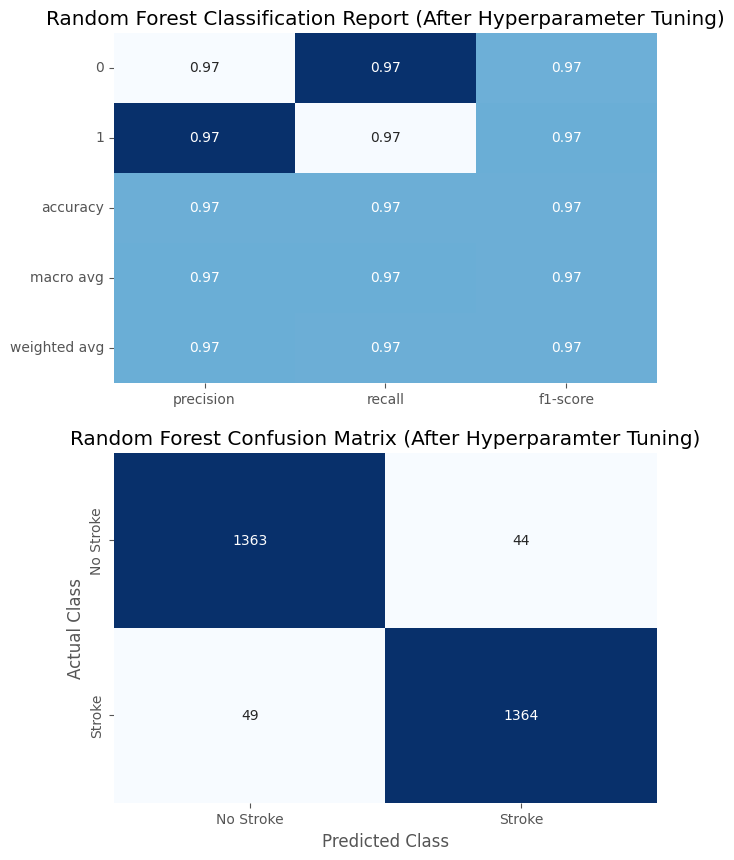

<Figure size 700x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

Model Name: Support Vector Machine
Training Score: 0.9893617021276596
Test Score: 0.9521276595744681


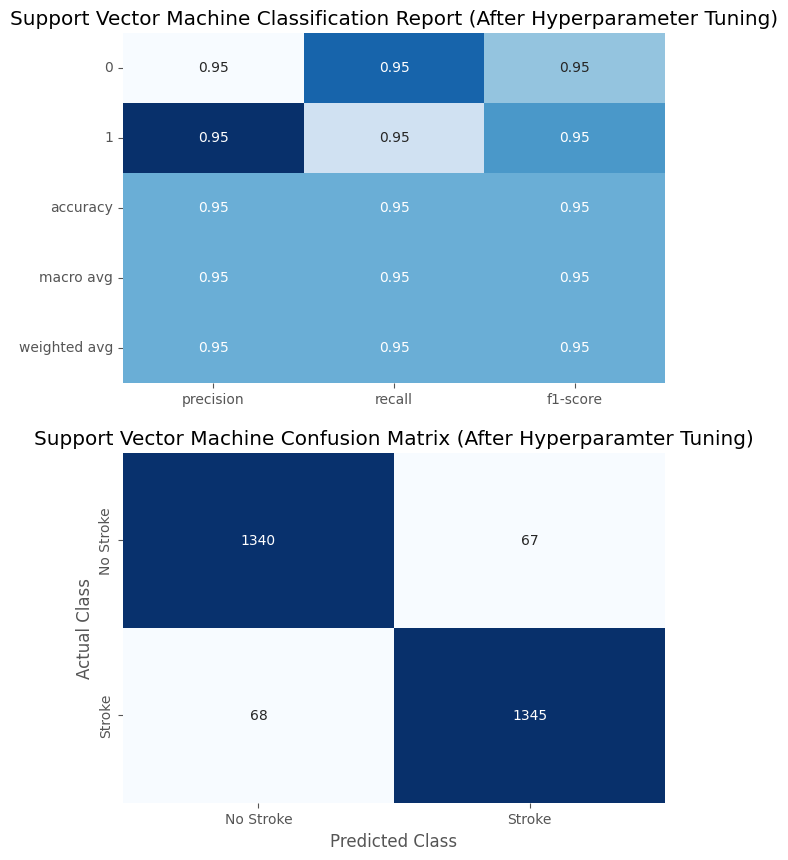

<Figure size 700x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

In [34]:
best_models = {"Random Forest": 
               RandomForestClassifier(n_estimators = 500, min_samples_split = 2, max_depth = 20, criterion= 'gini', random_state= 42),
               "Support Vector Machine": SVC(kernel = 'rbf', gamma = 'scale', C = 50, random_state= 42)}

#Model iteration to fit different models
for name, model in best_models.items():
    print(f'Model Name: {name}')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    training_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    report = classification_report(y_test, y_pred, output_dict= True)
    report_df = pd.DataFrame(report).T
    report_df = report_df.drop(columns=['support'])

    #Setting the style
    plt.style.use("ggplot")

    #PLotting classification report
    fig, ax = plt.subplots(2,1, figsize = [7,10])
    sns.heatmap(report_df, annot = True, cmap= 'Blues', cbar= False, ax = ax[0])
    ax[0].set_title(f'{name} Classification Report (After Hyperparameter Tuning)')
    
    #Plotting and customising confusion matrix
    matrix = confusion_matrix(y_test, y_pred)
    print(f'Training Score: {training_score}')
    print(f'Test Score: {test_score}')
    plt.figure(figsize= (7,5))
    plt.figure(figsize = (6,5))
    sns.heatmap(matrix, annot= True, fmt = 'd', cmap= 'Blues', cbar= False,
                xticklabels= ['No Stroke', 'Stroke'],
                yticklabels= ['No Stroke', 'Stroke'], ax = ax[1])
    ax[1].set_xlabel("Predicted Class")
    ax[1].set_ylabel("Actual Class")
    ax[1].set_title(f'{name} Confusion Matrix (After Hyperparamter Tuning)')
    plt.tight_layout()
    plt.show()



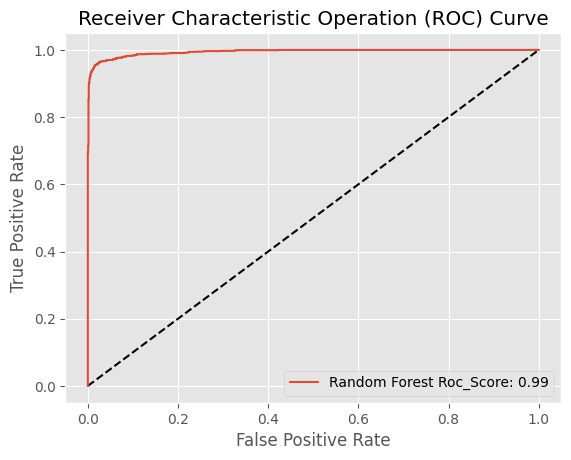

In [35]:
for name, model in best_models.items():
    if hasattr(model, "predict_proba"):
        y_pred_probs = model.predict_proba(X_test)[:,1] #Extracts the probability estimates of stroke cases
        roc_auc_scores = roc_auc_score(y_test, y_pred_probs)
    else:
        continue #Ignores model that don't have a probability estimation predictor
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr, tpr, label = f"{name} Roc_Score: {round(roc_auc_scores,2)}")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title("Receiver Characteristic Operation (ROC) Curve")
    plt.legend()